In [ ]:
!wget "http://motioncore-umh.cs.umn.edu/4980/college.csv"

--2023-02-15 01:36:52--  http://motioncore-umh.cs.umn.edu/4980/college.csv
Resolving motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)... 128.101.106.27
Connecting to motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)|128.101.106.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78854 (77K) [text/csv]
Saving to: ‘college.csv’

college.csv         100%[===================>]  77.01K  --.-KB/s    in 0.04s   

2023-02-15 01:36:52 (1.96 MB/s) - ‘college.csv’ saved [78854/78854]



Introduction: 
This notebook analyses a college database, taking into account several different features to check for accuracy of model with classifying colleges as selective or non selective based on their acceptance of applications from around the united states. This notebook uses a KNN classifier. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
df = pd.read_csv("college.csv")

In [ ]:
df

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
df["Top10perc"]

0      23
1      16
2      22
3      60
4      16
       ..
772     4
773    24
774    34
775    95
776    28
Name: Top10perc, Length: 777, dtype: int64

In [ ]:
selective = []
for i in range(777):
  if (df["Top10perc"][i] > 50):
    selective.append(1)
  else:
    selective.append(0)
df["Selective"] = selective

In [ ]:
df

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Selective
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [ ]:
df1 = df[['Accept', 'Apps', 'Expend', 'S.F.Ratio']].copy()
df1

,Accept,Apps,Expend,S.F.Ratio
0,1232,1660,7041,18.1
1,1924,2186,10527,12.2
2,1097,1428,8735,12.9
3,349,417,19016,7.7
4,146,193,10922,11.9
...,...,...,...,...
772,1515,2197,4469,21.0
773,1805,1959,9189,13.3
774,1915,2097,8323,14.4
775,2453,10705,40386,5.8


In [ ]:
import seaborn as sns
sns.set(font_scale=1.2)

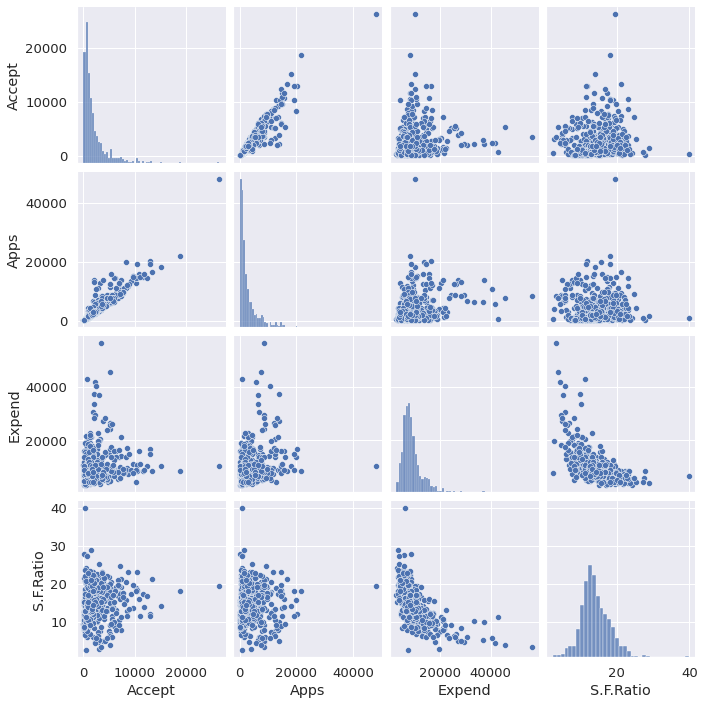

In [ ]:
sns.pairplot(df1)

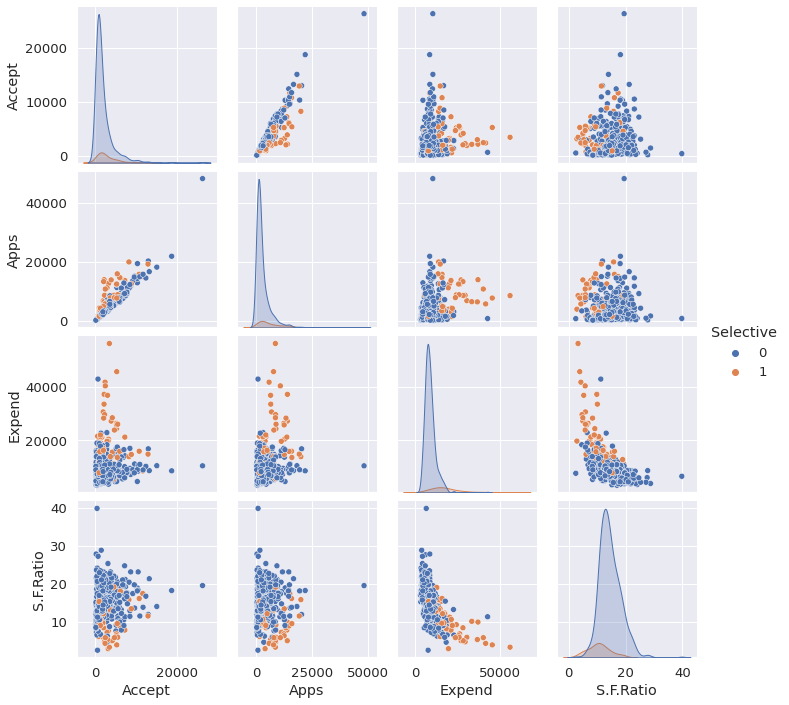

In [ ]:
sns.pairplot(df, x_vars = ['Accept', 'Apps', 'Expend', 'S.F.Ratio'], y_vars = ['Accept', 'Apps', 'Expend', 'S.F.Ratio'], hue='Selective')

In [ ]:
#Choose which data is featuers (X) and labels (y)
X = df[["Accept","Apps"]].to_numpy()
y = df["Selective"].to_numpy()

In [ ]:
def train_test_split(X,y,test_size):
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int(test_size*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)

In [ ]:
def nn_classify_sample(training_set, training_labels, new_example):
  dists = np.array([np.sum( (t-new_example)**2) for t in training_set])
  nearest = dists.argmin()
  return training_labels[nearest]

def nn_classify(train_data, train_features, test_features):
  num_result = test_features[:,0].size
  result = np.ones(num_result)
  for i in range(0,num_result):
    result[i] = nn_classify_sample(train_data[:,0:2], train_features, test_features[i])
  return result

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(doc_features, labels, test_size=0.33)

In [ ]:
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return correct_pred.sum()/total_preds

In [ ]:
accuracy(nn_classify, X_train, y_train, X_test, y_test)

0.9059500959692899

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
def knn_classifier(X_train, y_train, X_test):
  # instantiate learning model and fit data
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # predict the response
  pred = knn.predict(X_test)
  return pred

Testing smaller K values:

In [ ]:
k = 2 #awful hack!
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
pred = knn_classifier(X_train, y_train, X_test)
acc = accuracy(knn_classifier, X_train, y_train, X_test, y_test)
acc

0.9117082533589251

In [ ]:
prec = precision_score(y_test, pred)
print('Precision: %.3f' % prec)
rec = recall_score(y_test, pred)
print('Recall: %.3f' % rec)
f1_s =  2*(prec*rec)/(prec+rec)
print('F1-Score: %.3f' %f1_s)

Precision: 0.545
Recall: 0.250
F1-Score: 0.343


Training set

In [ ]:
k = 2 #awful hack!
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
pred = knn_classifier(X_train, y_train, X_train)
acc = accuracy(knn_classifier, X_train, y_train, X_train, y_train)
acc

0.9140625

In [ ]:
prec = precision_score(y_train, pred)
print('Precision: %.3f' % prec)
rec = recall_score(y_train, pred)
print('Recall: %.3f' % rec)
f1_s =  2*(prec*rec)/(prec+rec)
print('F1-Score: %.3f' %f1_s)

Precision: 1.000
Recall: 0.267
F1-Score: 0.421


Testing with a larger K value

In [ ]:
k = 100 #awful hack!
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
pred = knn_classifier(X_train, y_train, X_test)
acc = accuracy(knn_classifier, X_train, y_train, X_test, y_test)
acc

0.9097888675623801

In [ ]:
prec = precision_score(y_test, pred)
print('Precision: %.3f' % prec)
rec = recall_score(y_test, pred)
print('Recall: %.3f' % rec)
f1_s =  2*(prec*rec)/(prec+rec)
print('F1-Score: %.3f' %f1_s)

Precision: 0.000
Recall: 0.000
F1-Score: nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-46-a0f7734c6f1a>:5: RuntimeWarning: invalid value encountered in double_scalars
  f1_s =  2*(prec*rec)/(prec+rec)


Training Set

In [ ]:
k = 100 #awful hack!
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
pred = knn_classifier(X_train, y_train, X_train)
acc = accuracy(knn_classifier, X_train, y_train, X_train, y_train)
acc

0.88671875

In [ ]:
prec = precision_score(y_train, pred)
print('Precision: %.3f' % prec)
rec = recall_score(y_train, pred)
print('Recall: %.3f' % rec)
f1_s =  2*(prec*rec)/(prec+rec)
print('F1-Score: %.3f' %f1_s)

Precision: 0.000
Recall: 0.000
F1-Score: nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-56-f73ec8fa42d1>:5: RuntimeWarning: invalid value encountered in double_scalars
  f1_s =  2*(prec*rec)/(prec+rec)


Testing with classifier that classifies all schools as Selective

In [ ]:
k =5
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)

y_train_all_yes = y_train.copy()
for i, x in enumerate(y_train_all_yes):
  y_train_all_yes[i] = 1

pred = knn_classifier(X_train, y_train, X_test)
acc = accuracy(knn_classifier, X_train, y_train_all_yes, X_test, y_test)
acc

0.09980806142034548

In [ ]:
prec = precision_score(y_test, pred)
print('Precision: %.3f' % prec)
rec = recall_score(y_test, pred)
print('Recall: %.3f' % rec)
f1_s =  2*(prec*rec)/(prec+rec)
print('F1-Score: %.3f' %f1_s)

Precision: 0.762
Recall: 0.308
F1-Score: 0.438


Training set

In [ ]:
k =5
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)

y_train_all_yes = y_train.copy()
for i, x in enumerate(y_train_all_yes):
  y_train_all_yes[i] = 1

pred = knn_classifier(X_train, y_train, X_train)
acc = accuracy(knn_classifier, X_train, y_train, X_train, y_train)
acc

0.94140625

In [ ]:
prec = precision_score(y_train, pred)
print('Precision: %.3f' % prec)
rec = recall_score(y_train, pred)
print('Recall: %.3f' % rec)
f1_s =  2*(prec*rec)/(prec+rec)
print('F1-Score: %.3f' %f1_s)

Precision: 0.833
Recall: 0.435
F1-Score: 0.571


Testing with classifier that classifies none of the schools as Selective

In [ ]:
k =5
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)

y_train_all_no = y_train.copy()
for i, x in enumerate(y_train_all_no):
  y_train_all_no[i] = 0

pred = knn_classifier(X_train, y_train, X_test)
acc = accuracy(knn_classifier, X_train, y_train_all_no, X_test, y_test)
acc

0.9021113243761996

In [ ]:
prec = precision_score(y_test, pred)
print('Precision: %.3f' % prec)
rec = recall_score(y_test, pred)
print('Recall: %.3f' % rec)
f1_s =  2*(prec*rec)/(prec+rec)
print('F1-Score: %.3f' %f1_s)

Precision: 0.700
Recall: 0.275
F1-Score: 0.394


Training Set

In [ ]:
 k=5
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)

y_train_all_no = y_train.copy()
for i, x in enumerate(y_train_all_no):
  y_train_all_no[i] = 0

pred = knn_classifier(X_train, y_train, X_train)
acc = accuracy(knn_classifier, X_train, y_train, X_train, y_train)
acc

0.9296875

In [ ]:
prec = precision_score(y_train, pred)
print('Precision: %.3f' % prec)
rec = recall_score(y_train, pred)
print('Recall: %.3f' % rec)
f1_s =  2*(prec*rec)/(prec+rec)
print('F1-Score: %.3f' %f1_s)

Precision: 0.833
Recall: 0.385
F1-Score: 0.526
